In [1]:
###### cell 0 
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path
import cv2
data = json.load(open('/mmdetection/data/damage_detection/augmentation/new_test_generali.json'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'totaled')

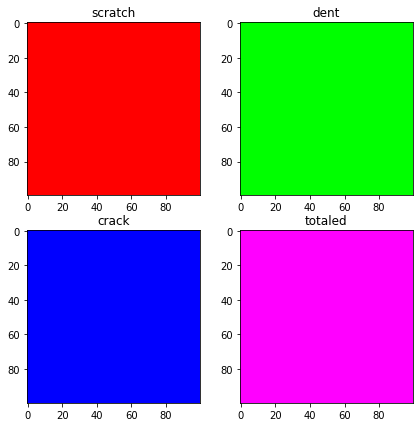

In [2]:
###### cell 1
clr = {
    0 : (255,0,0),
    1 : (0,255,0),
    2 : (0,0,255),
    3 : (100,0,200)
}
img = np.zeros((100,100,3))

fig, axis = plt.subplots(2, 2,figsize=(7,7))

###0
img[:,:,:] = clr[0]
axis[0,0].imshow(img)
axis[0,0].set_title('scratch')

###1
img[:,:,:] = clr[1]
axis[0,1].imshow(img)
axis[0,1].set_title('dent')

###2
img[:,:,:] = clr[2]
axis[1,0].imshow(img)
axis[1,0].set_title('crack')

###3
img[:,:,:] = clr[3]
axis[1,1].imshow(img)
axis[1,1].set_title('totaled')

In [3]:
###### cell 2
def plot_case(case_id):
    imgs = [i for i in data['images'] if str(case_id) == i['case_id']]
    print(len(imgs))
    
    col = 3
    row = int(len(imgs)/col)+1
    
    fig, axis = plt.subplots(row, col,figsize=(15,15))

    for idx,i in enumerate(imgs):
        annos = [np.array(a['segmentation']).reshape(-1,2).astype(np.int32) 
                 for a in data['annotations'] if a['image_id'] == i['id']]
        
        labels = [a['category_id'] for a in data['annotations'] if a['image_id'] == i['id']]
        
        image = cv2.imread('/mmdetection/data/damage_detection/augmentation/new_gen/'+i['case_id']+'/'+i['file_name'])
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        for i_a,a in enumerate(annos) :  
            image = cv2.drawContours(image,[a],-1,clr[labels[i_a]],7)
        #print('yolo : ',int(idx/col),idx%col)
        axis[int(idx/col),idx%col].imshow(image)
        axis[int(idx/col),idx%col].set_title(i['id'])

3


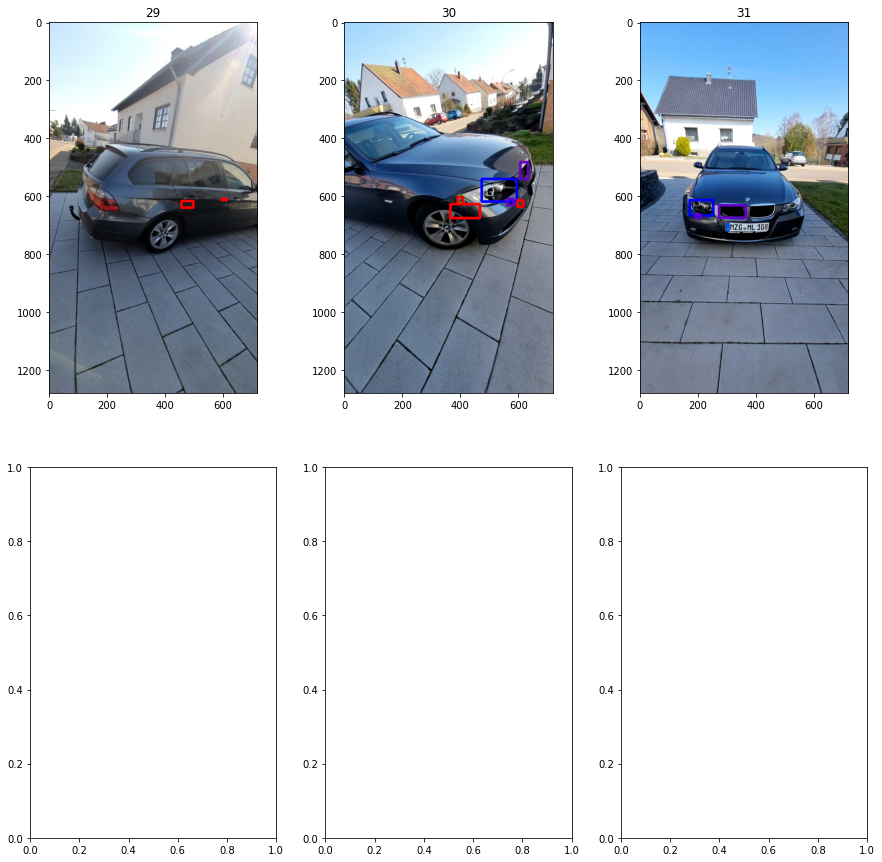

In [6]:
###### cell 3
plot_case(21849022)

9


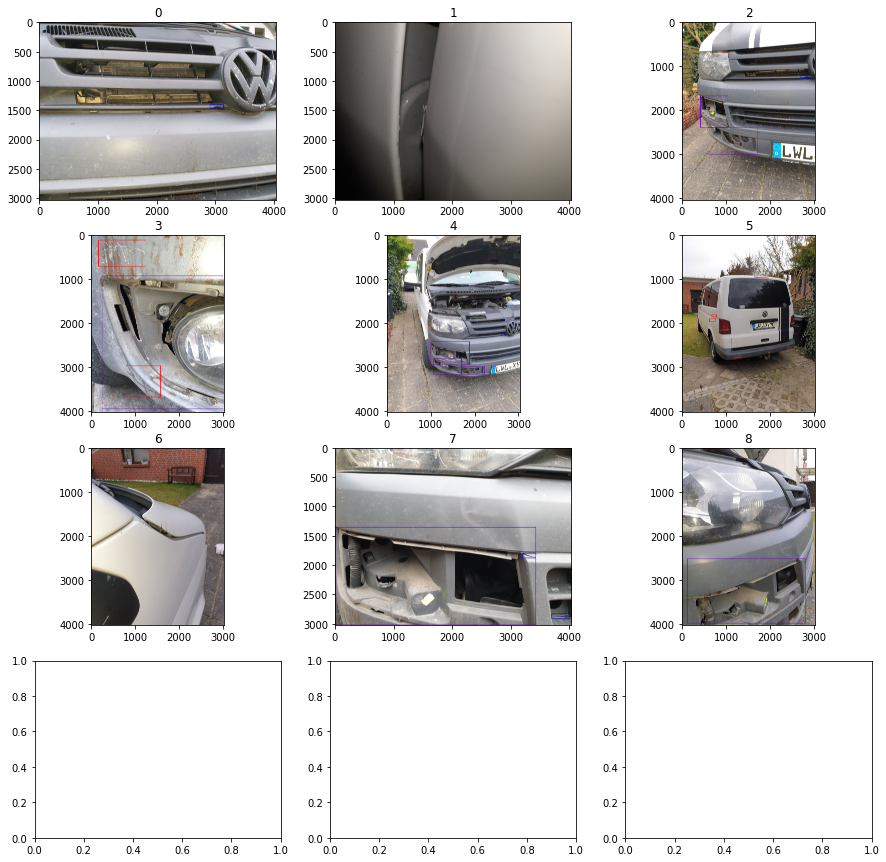

In [5]:
plot_case('022493421')